# 6.6 Time Series Analysis

## The script below contains the following:
#### 1. Import libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Data

## 1. Import libraries and data

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [3]:
%matplotlib inline

In [4]:
# Creating the path variable

path = os.getcwd()[0:os.getcwd().find('03 Scripts')]

In [5]:
# Importing state dataframe

st = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'states.csv'), index_col = False)

In [6]:
st.shape

(1275, 12)

In [7]:
st.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,Alabama,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,Alaska,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,Arizona,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,Arkansas,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,California,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


## 2. Subsetting, wrangling and cleaning the data 

In [8]:
st.isnull().sum()

STATE                            0
YEAR                             0
ENROLL                          51
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               51
CAPITAL_OUTLAY_EXPENDITURE       0
dtype: int64

In [10]:
df = st[st['YEAR'] > 1992]

In [11]:
df.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
51,Alabama,1993,727716.0,2827391,331409,1729295,766687,2833433,1564558,794146,237222.0,204207
52,Alaska,1993,121156.0,1191398,176150,775829,239419,1126398,494917,433788,36291.0,135791
53,Arizona,1993,676297.0,3427976,318465,1415407,1694104,3623946,1578889,1000914,164083.0,680139
54,Arkansas,1993,311432.0,1346909,128196,771079,447634,1376067,782791,386526,68617.0,97824
55,California,1993,5129788.0,28043338,2151157,17064146,8828035,28110986,15281147,8914559,1608514.0,1944760


In [12]:
df.isnull().sum()

STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
dtype: int64

#### The subset was created so the dataset does not have any null values.

# Enroll

In [13]:
df_enroll = df[['YEAR', 'ENROLL']]

In [14]:
df_enroll.head()

,YEAR,ENROLL
51,1993,727716.0
52,1993,121156.0
53,1993,676297.0
54,1993,311432.0
55,1993,5129788.0


In [15]:
# Grouping the values for analysis

df_gr = df.groupby(['YEAR'])['ENROLL'].sum()

In [16]:
# Creating the dataframe from grouped values

df_gr = df_gr.to_frame().reset_index()

In [17]:
df_gr

,YEAR,ENROLL
0,1993,40904771.0
1,1994,40870582.0
2,1995,43807625.0
3,1996,44570461.0
4,1997,45307367.0
5,1998,45772962.0
6,1999,46160175.0
7,2000,46432782.0
8,2001,46731110.0
9,2002,47114728.0


In [18]:
# Set the year column as the index

from datetime import datetime

df_gr['datetime'] = pd.to_datetime(df_gr['YEAR'], format = '%Y') # Create a datetime column from "Date.""
df_gr = df_gr.set_index('datetime') # Set the datetime as the index of the dataframe.
df_gr.drop(['YEAR'], axis=1, inplace=True) # Drop the "Date" column.
df_gr.head()

,ENROLL
datetime,
1993-01-01,40904771.0
1994-01-01,40870582.0
1995-01-01,43807625.0
1996-01-01,44570461.0
1997-01-01,45307367.0


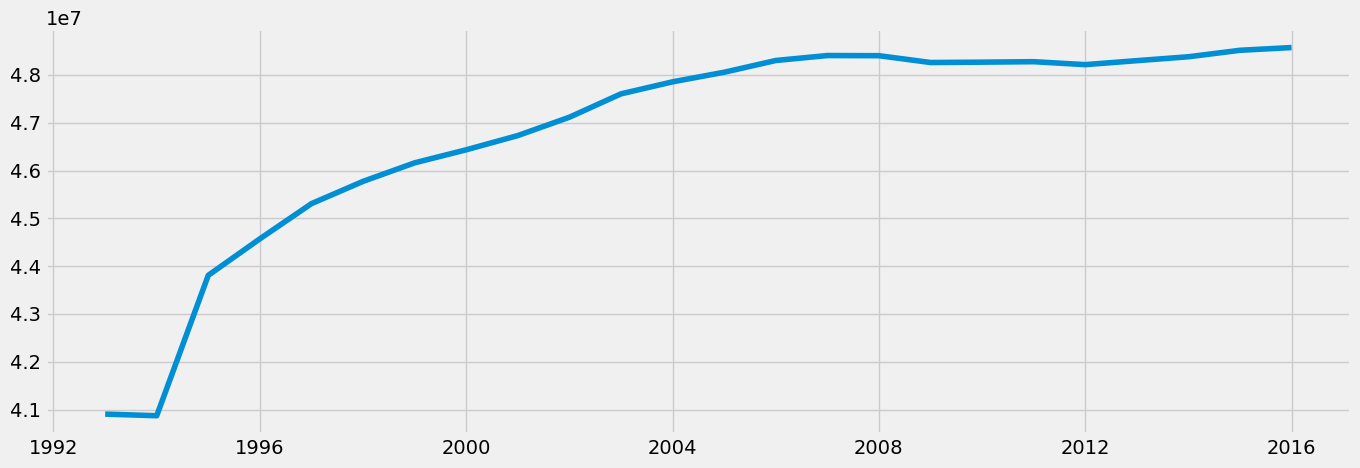

In [19]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_gr)

## 3. Time series analysis - Decomposition

In [20]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_gr, model='additive')

In [21]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

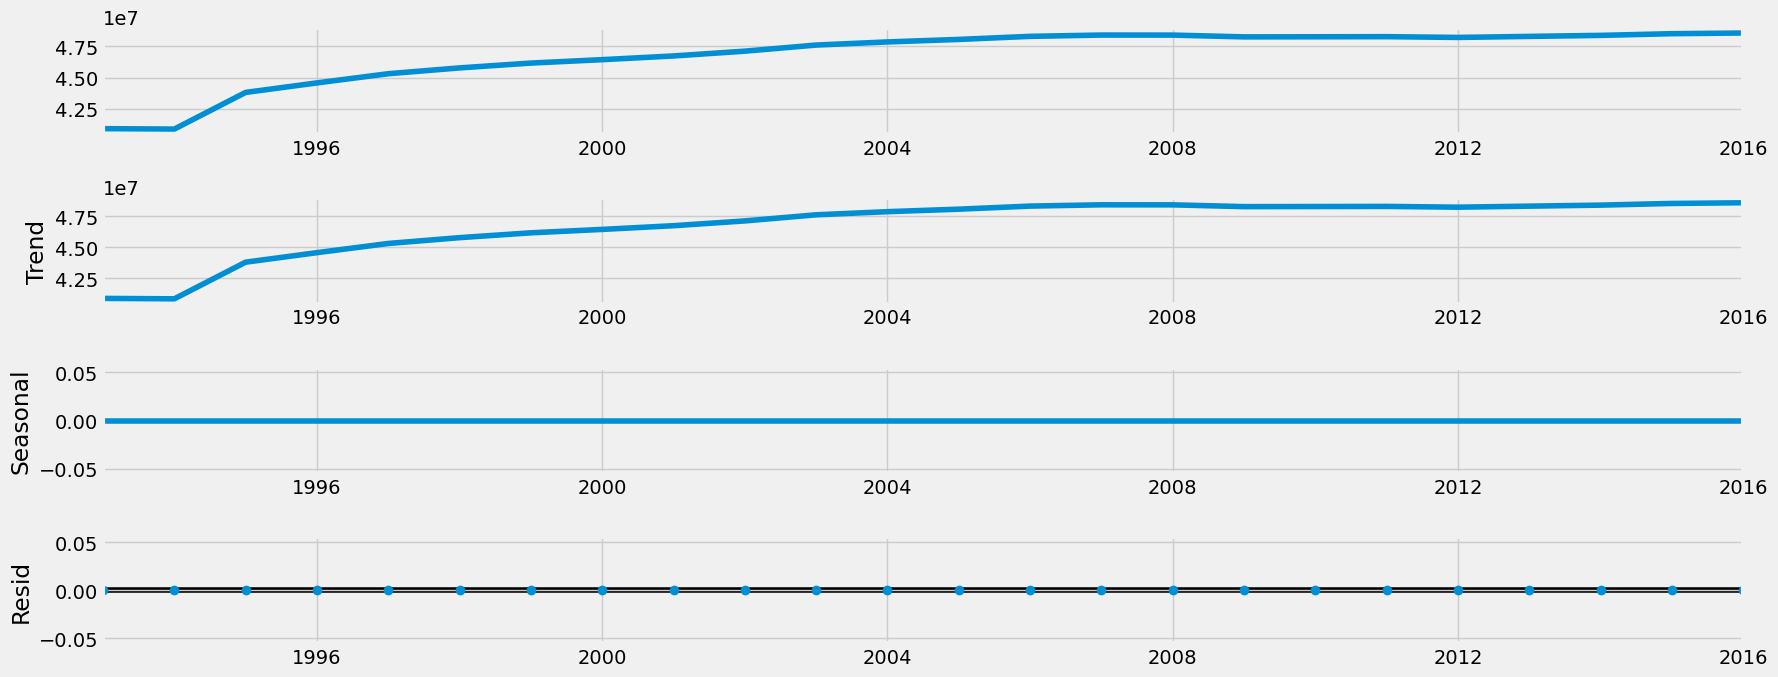

In [22]:
# Plot the separate components

decomposition.plot()
plt.show()

#### The level and trend has no change this indicates that the data has no much noise so the data need not be smoothed. 
#### The trend shows a sudden increase in 1995 and there after there is a gradual increase in the data. 
#### There is no seasonality in the data that is why the line is flat. 
#### There is no noise in the data.

## 4. Testing for stationarity

In [23]:
# Import the function
from statsmodels.tsa.stattools import adfuller 

# Define the function
def dickey_fuller(timeseries): 

    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)


dickey_fuller(df_gr['ENROLL'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.670715
p-value                         0.446261
Number of Lags Used             9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


#### The p-value > 0.05 so the test result is not significant. The test statistic is larger than the critical value so the null hypothesis of presence of unit root cannot be rejected. This means that the data is not stationary.

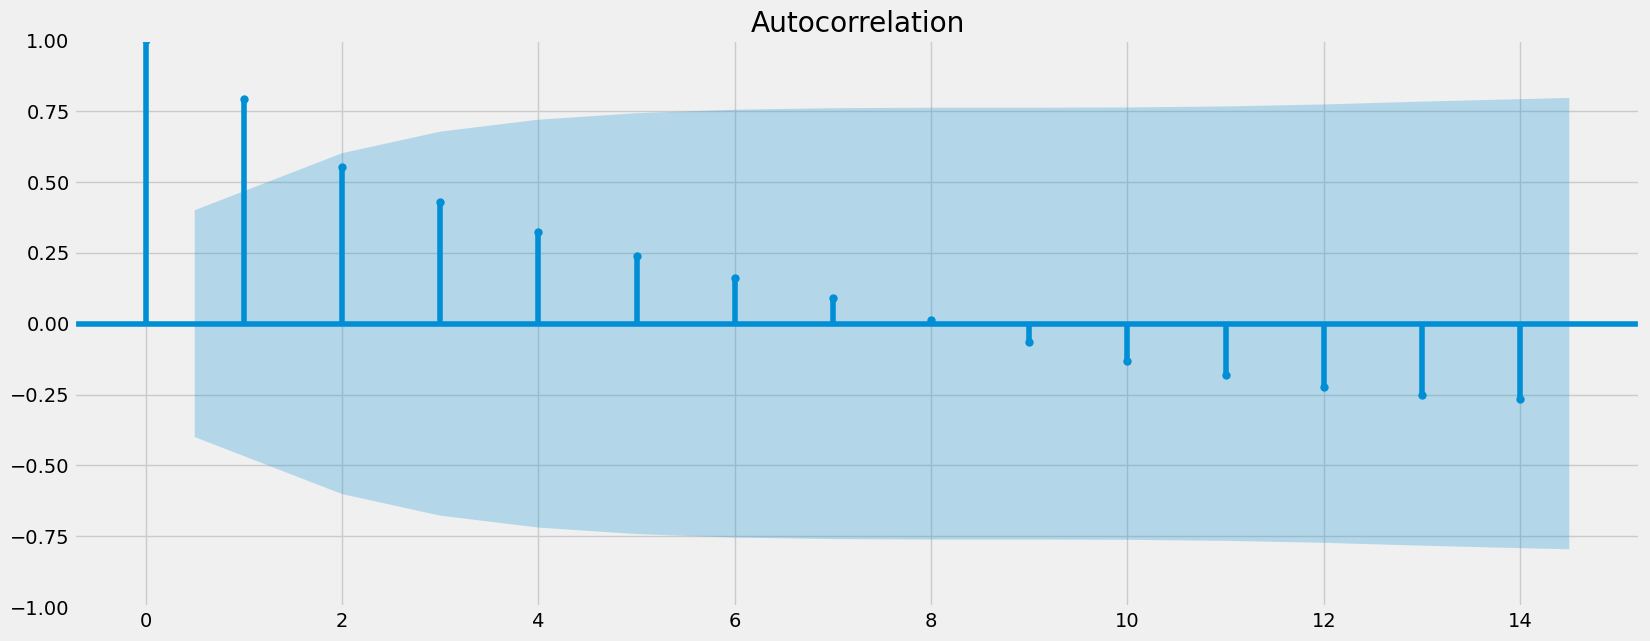

In [24]:
# Check out a plot of autocorrelations

# Import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_gr)
plt.show()

#### There are few lags beyond the confidence level.

## 5. Stationarizing the data

In [25]:
data_diff = df_gr - df_gr.shift(1)

In [26]:
data_diff.dropna(inplace = True)

In [27]:
data_diff.head()

,ENROLL
datetime,
1994-01-01,-34189.0
1995-01-01,2937043.0
1996-01-01,762836.0
1997-01-01,736906.0
1998-01-01,465595.0


In [28]:
data_diff.columns

Index(['ENROLL'], dtype='object')

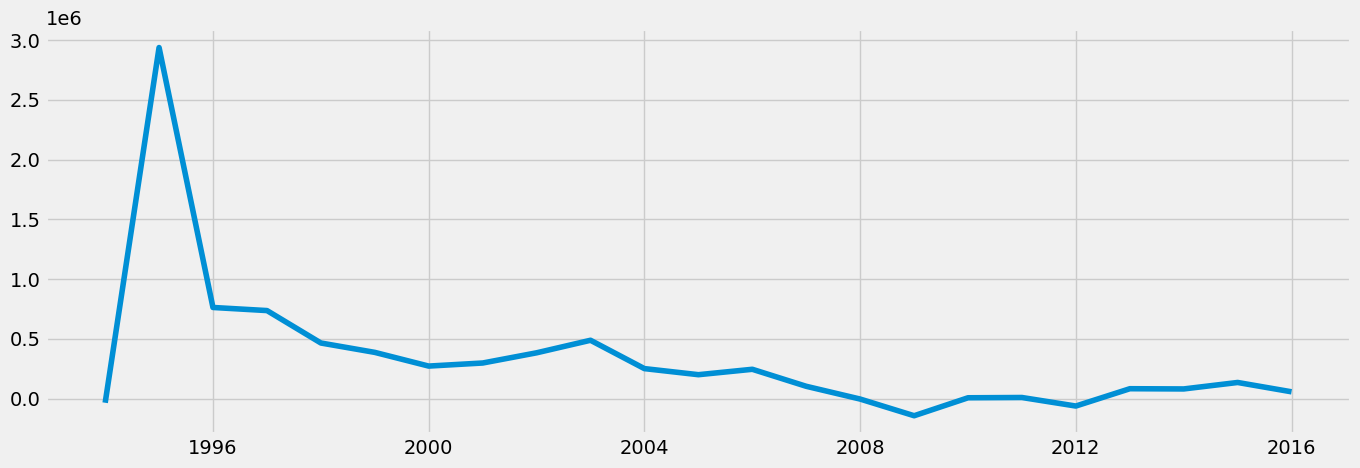

In [29]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [30]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.697051
p-value                         0.074550
Number of Lags Used             9.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


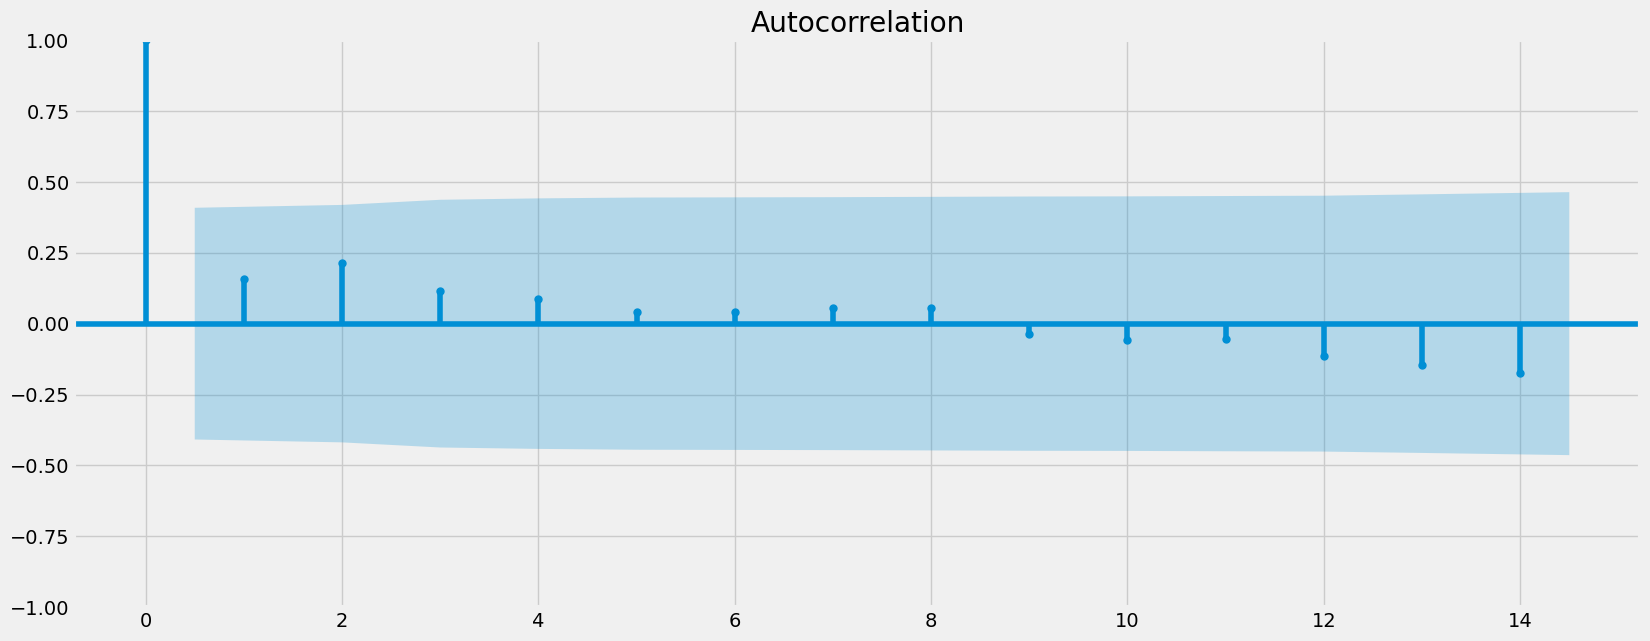

In [31]:
plot_acf(data_diff)
plt.show()

In [32]:
data_diff_1 = data_diff - data_diff.shift(1)

In [33]:
data_diff_1.dropna(inplace = True)

In [34]:
data_diff_1.head()

,ENROLL
datetime,
1995-01-01,2971232.0
1996-01-01,-2174207.0
1997-01-01,-25930.0
1998-01-01,-271311.0
1999-01-01,-78382.0


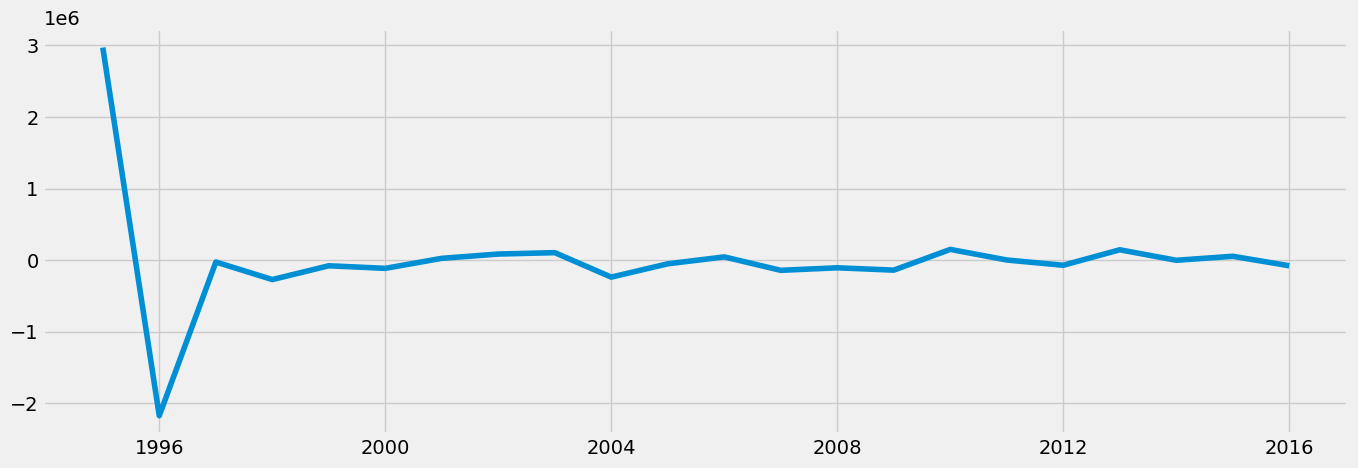

In [35]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_1)

In [36]:
dickey_fuller(data_diff_1)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.140513
p-value                         0.228539
Number of Lags Used             9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


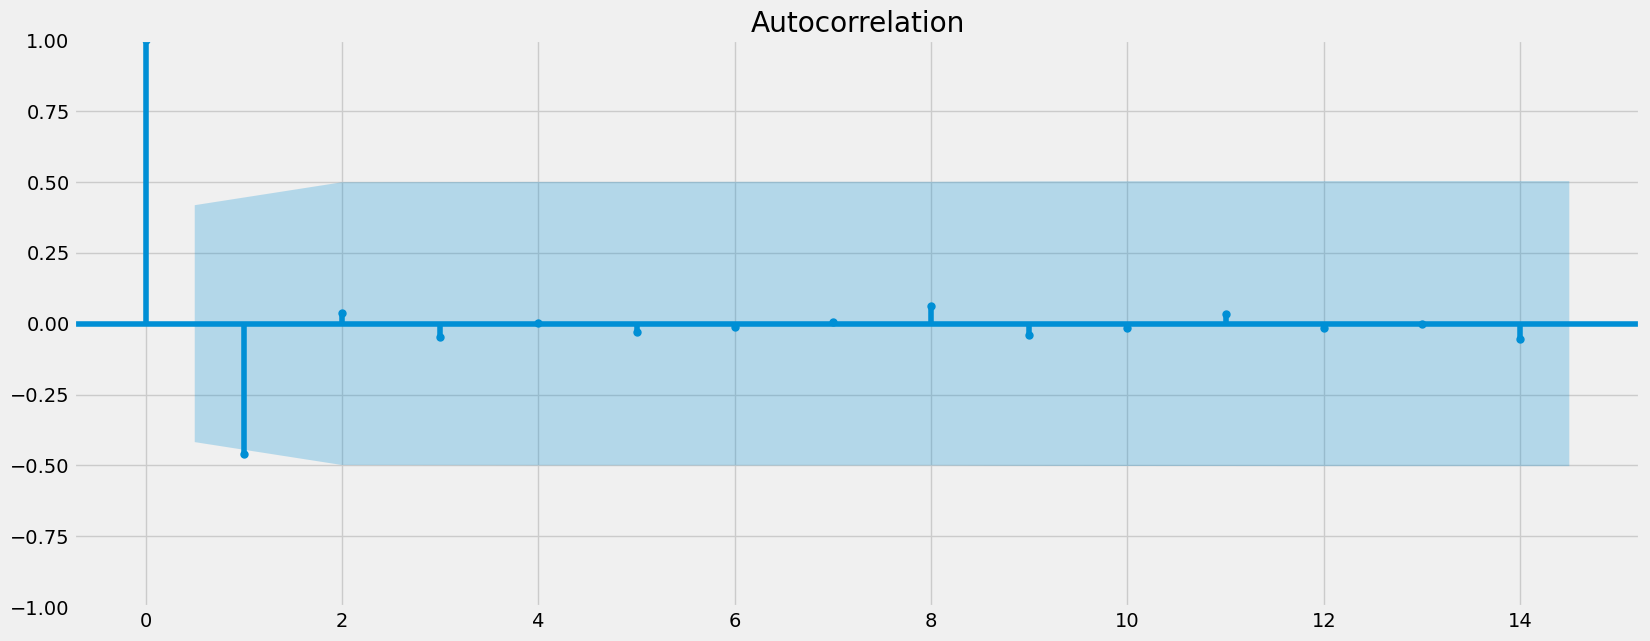

In [37]:
plot_acf(data_diff_1)
plt.show()

In [38]:
data_diff_2 = data_diff_1 - data_diff_1.shift(1)

In [39]:
data_diff_2.dropna(inplace = True)

In [40]:
data_diff_2.head()

,ENROLL
datetime,
1996-01-01,-5145439.0
1997-01-01,2148277.0
1998-01-01,-245381.0
1999-01-01,192929.0
2000-01-01,-36224.0


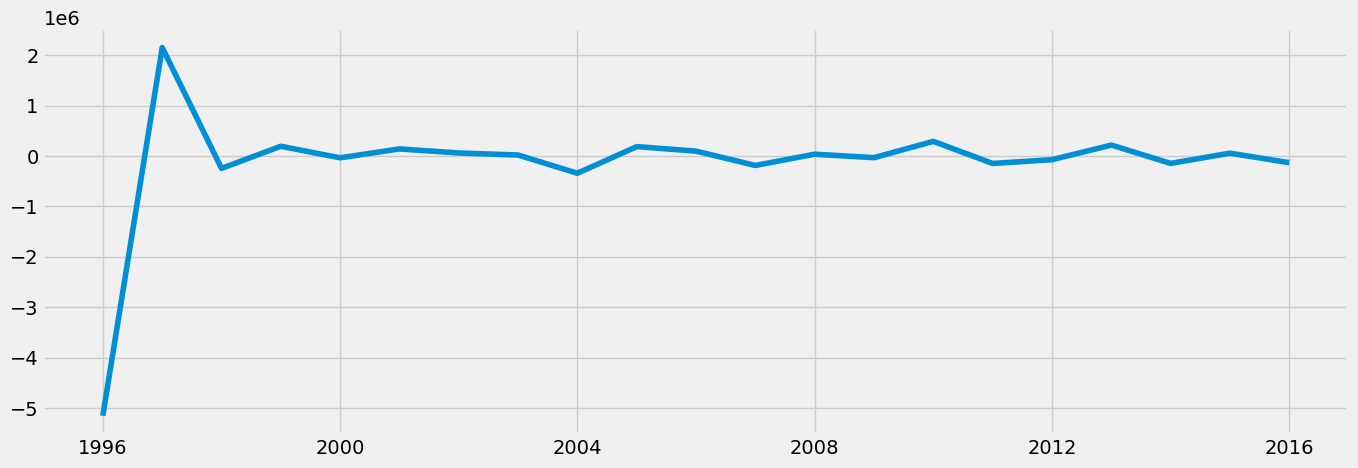

In [41]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [42]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.752557
p-value                         0.000067
Number of Lags Used             6.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


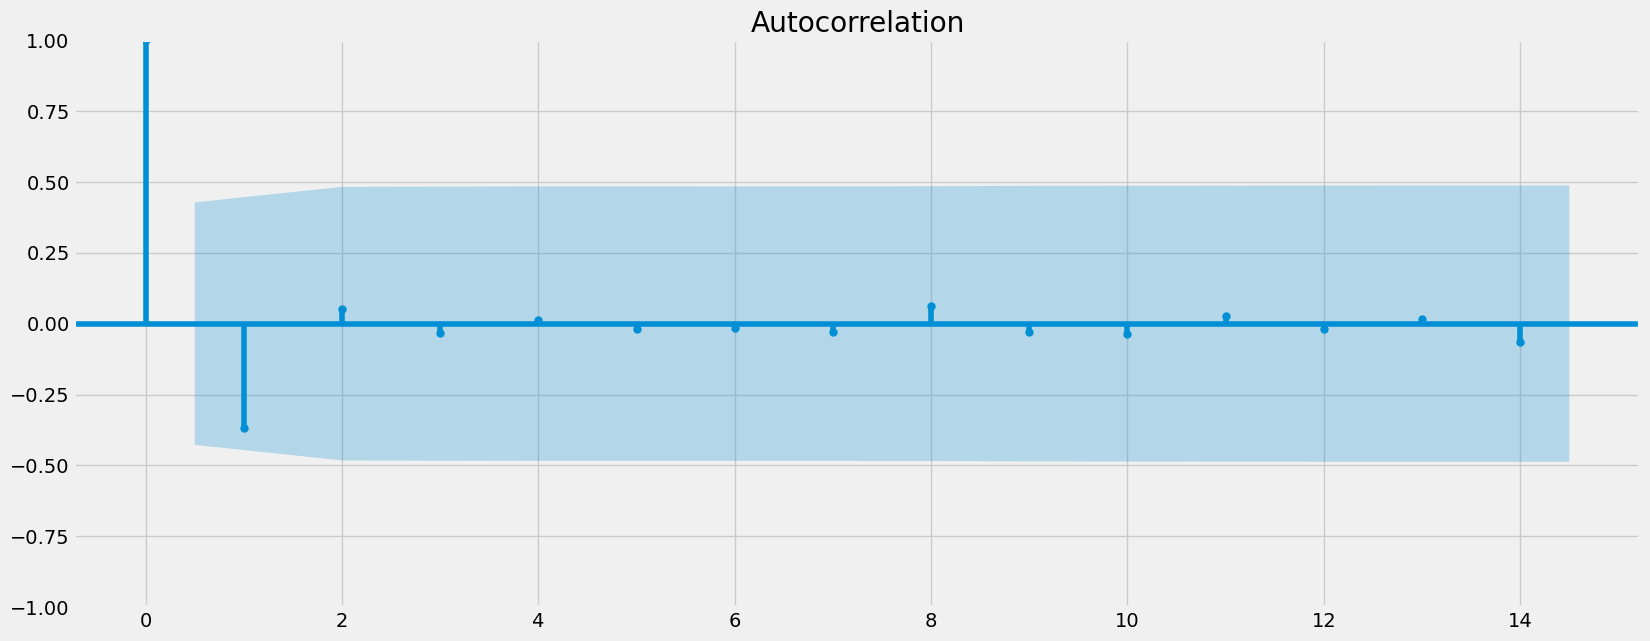

In [43]:
plot_acf(data_diff_2)
plt.show()

#### After differencing for 3 times the p value is less than 0.05 and the t statistic value is smaller than critical value, thus rejecting the null hypothesis and the data is now stationary.The autocorrelation has improved after differencing.

# Revenue

In [44]:
df_rev = df[['YEAR', 'TOTAL_REVENUE']]

In [45]:
df_rev

,YEAR,TOTAL_REVENUE
51,1993,2827391
52,1993,1191398
53,1993,3427976
54,1993,1346909
55,1993,28043338
...,...,...
1270,2016,16259274
1271,2016,14964364
1272,2016,3391579
1273,2016,11697466


In [46]:
df_rev_gr = df.groupby(['YEAR'])['TOTAL_REVENUE'].sum()

In [47]:
df_rev_gr = df_rev_gr.to_frame().reset_index()

In [48]:
df_rev_gr

,YEAR,TOTAL_REVENUE
0,1993,243206654
1,1994,250750573
2,1995,279277709
3,1996,292952786
4,1997,311885259
5,1998,331730773
6,1999,354681711
7,2000,379602220
8,2001,408404990
9,2002,426548936


In [49]:
df_rev_gr.shape

(24, 2)

In [50]:
# Set the year column as the index

from datetime import datetime

df_rev_gr['datetime'] = pd.to_datetime(df_rev_gr['YEAR'], format = '%Y') # Create a datetime column from "Date.""
df_rev_gr = df_rev_gr.set_index('datetime') # Set the datetime as the index of the dataframe.
df_rev_gr.drop(['YEAR'], axis=1, inplace=True) # Drop the "Date" column.
df_rev_gr.head()

,TOTAL_REVENUE
datetime,
1993-01-01,243206654
1994-01-01,250750573
1995-01-01,279277709
1996-01-01,292952786
1997-01-01,311885259


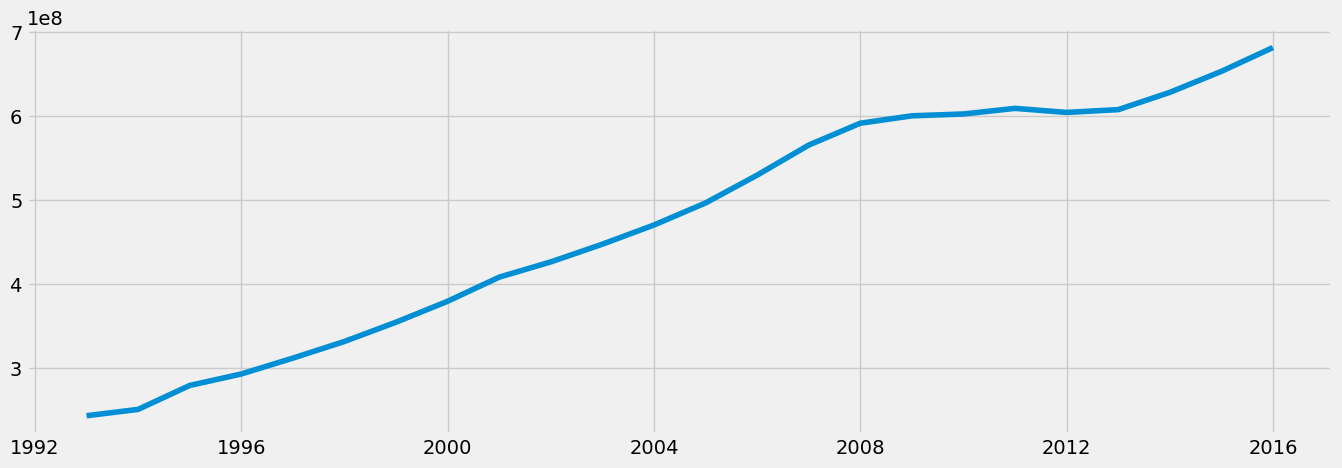

In [51]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_rev_gr)

In [52]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_rev_gr, model='additive')

In [53]:
rcParams['figure.figsize'] = 18, 7

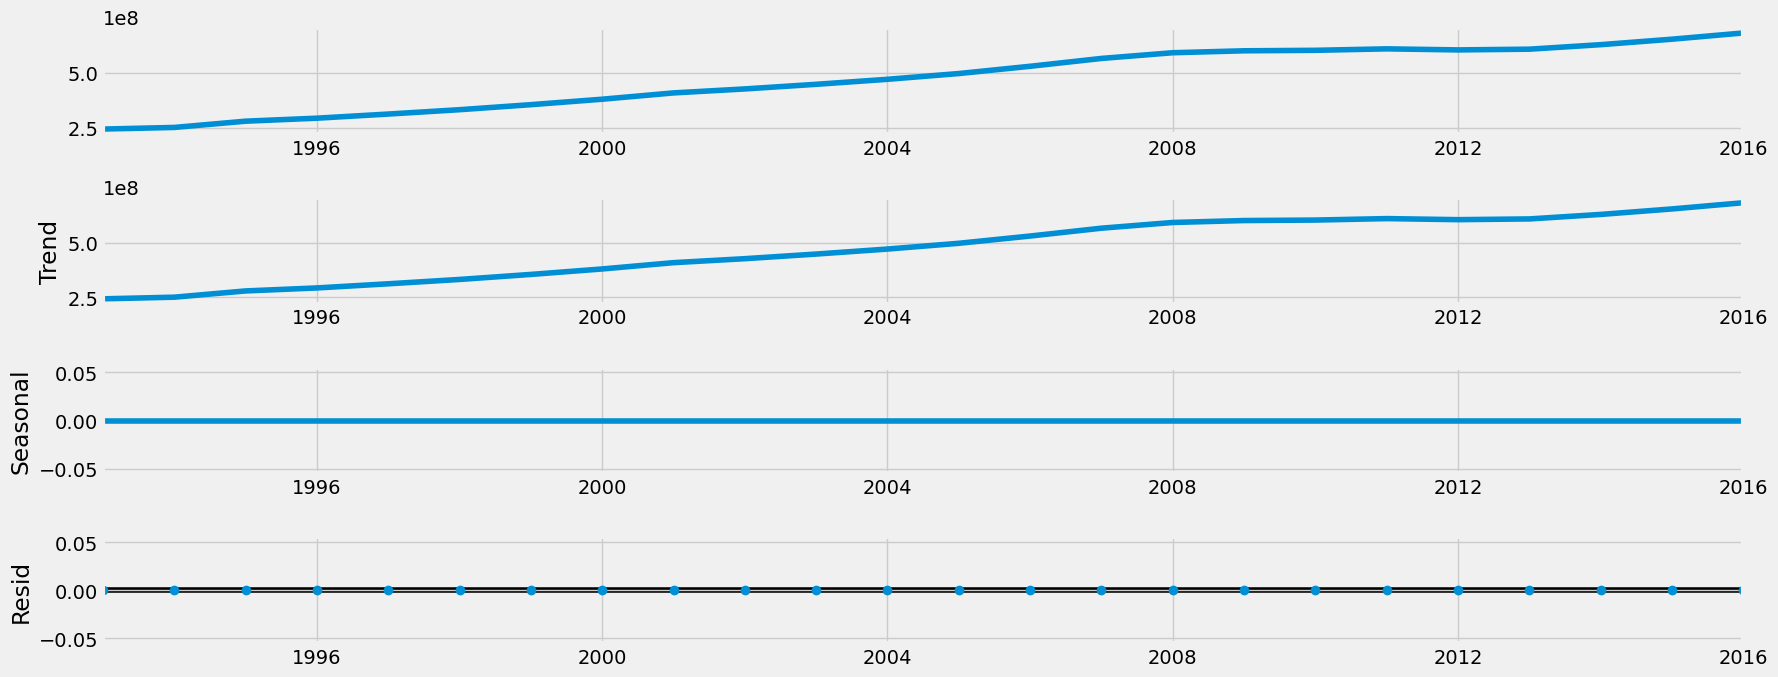

In [54]:
# Plot the separate components

decomposition.plot()
plt.show()

In [55]:
dickey_fuller(df_rev_gr['TOTAL_REVENUE'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.398159
p-value                         0.981426
Number of Lags Used             9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


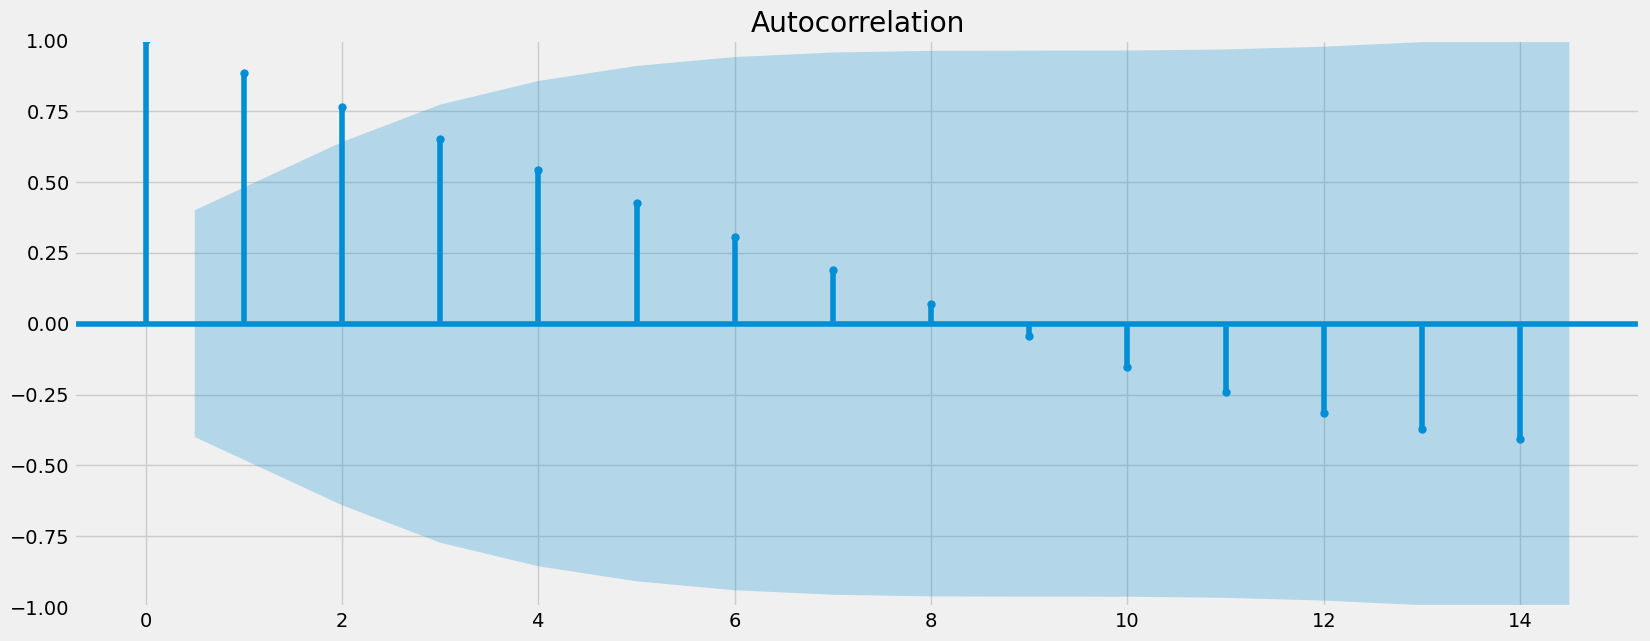

In [56]:
plot_acf(df_rev_gr)
plt.show()

In [57]:
data_diff_rev = df_rev_gr - df_rev_gr.shift(1)

In [58]:
data_diff_rev.dropna(inplace = True)

In [59]:
data_diff_rev.head()

,TOTAL_REVENUE
datetime,
1994-01-01,7543919.0
1995-01-01,28527136.0
1996-01-01,13675077.0
1997-01-01,18932473.0
1998-01-01,19845514.0


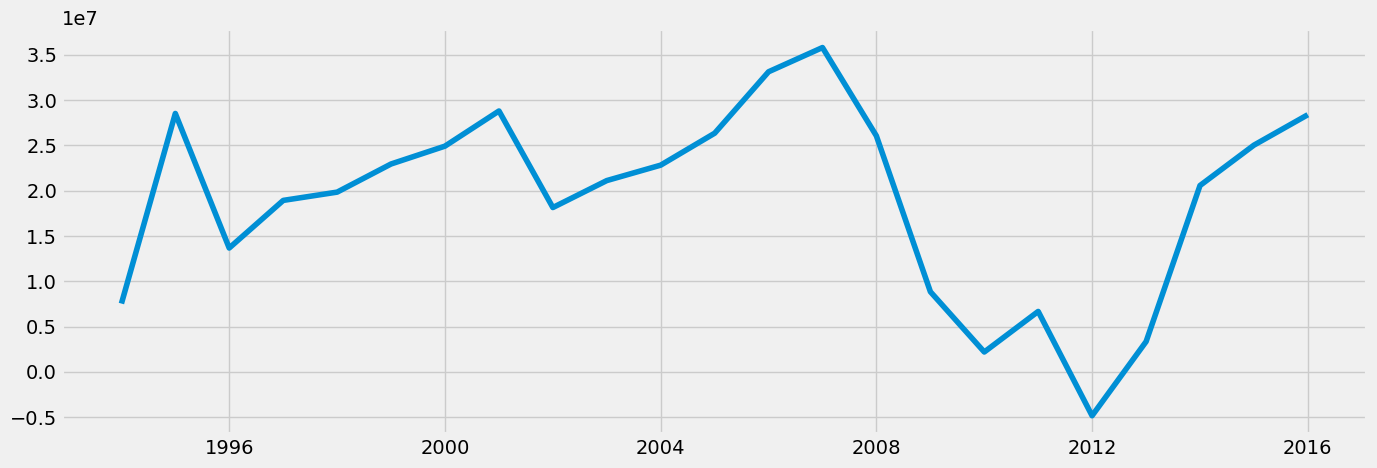

In [60]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_rev)

In [61]:
dickey_fuller(data_diff_rev)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.778707
p-value                         0.003133
Number of Lags Used             8.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


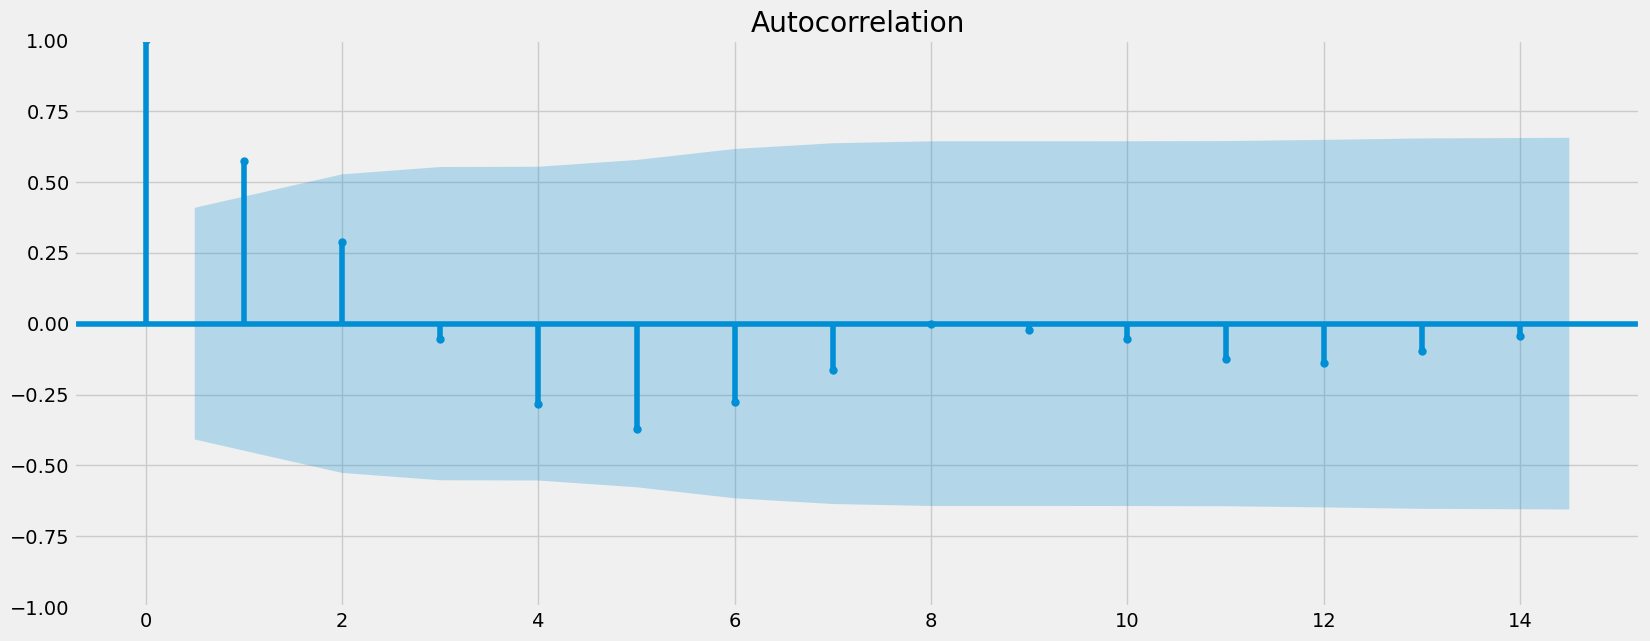

In [62]:
plot_acf(data_diff_rev)
plt.show()